In [57]:
import matplotlib.pyplot as plt
import sys

In [24]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=15)       

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333
4 16233.3333 31533.3333
5 16250.0000 31516.6667
6 16300.0000 29250.0000
7 16500.0000 29933.3333
8 16516.6667 28800.0000


In [25]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [26]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.figure(figsize=(20, 16))
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

In [27]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)

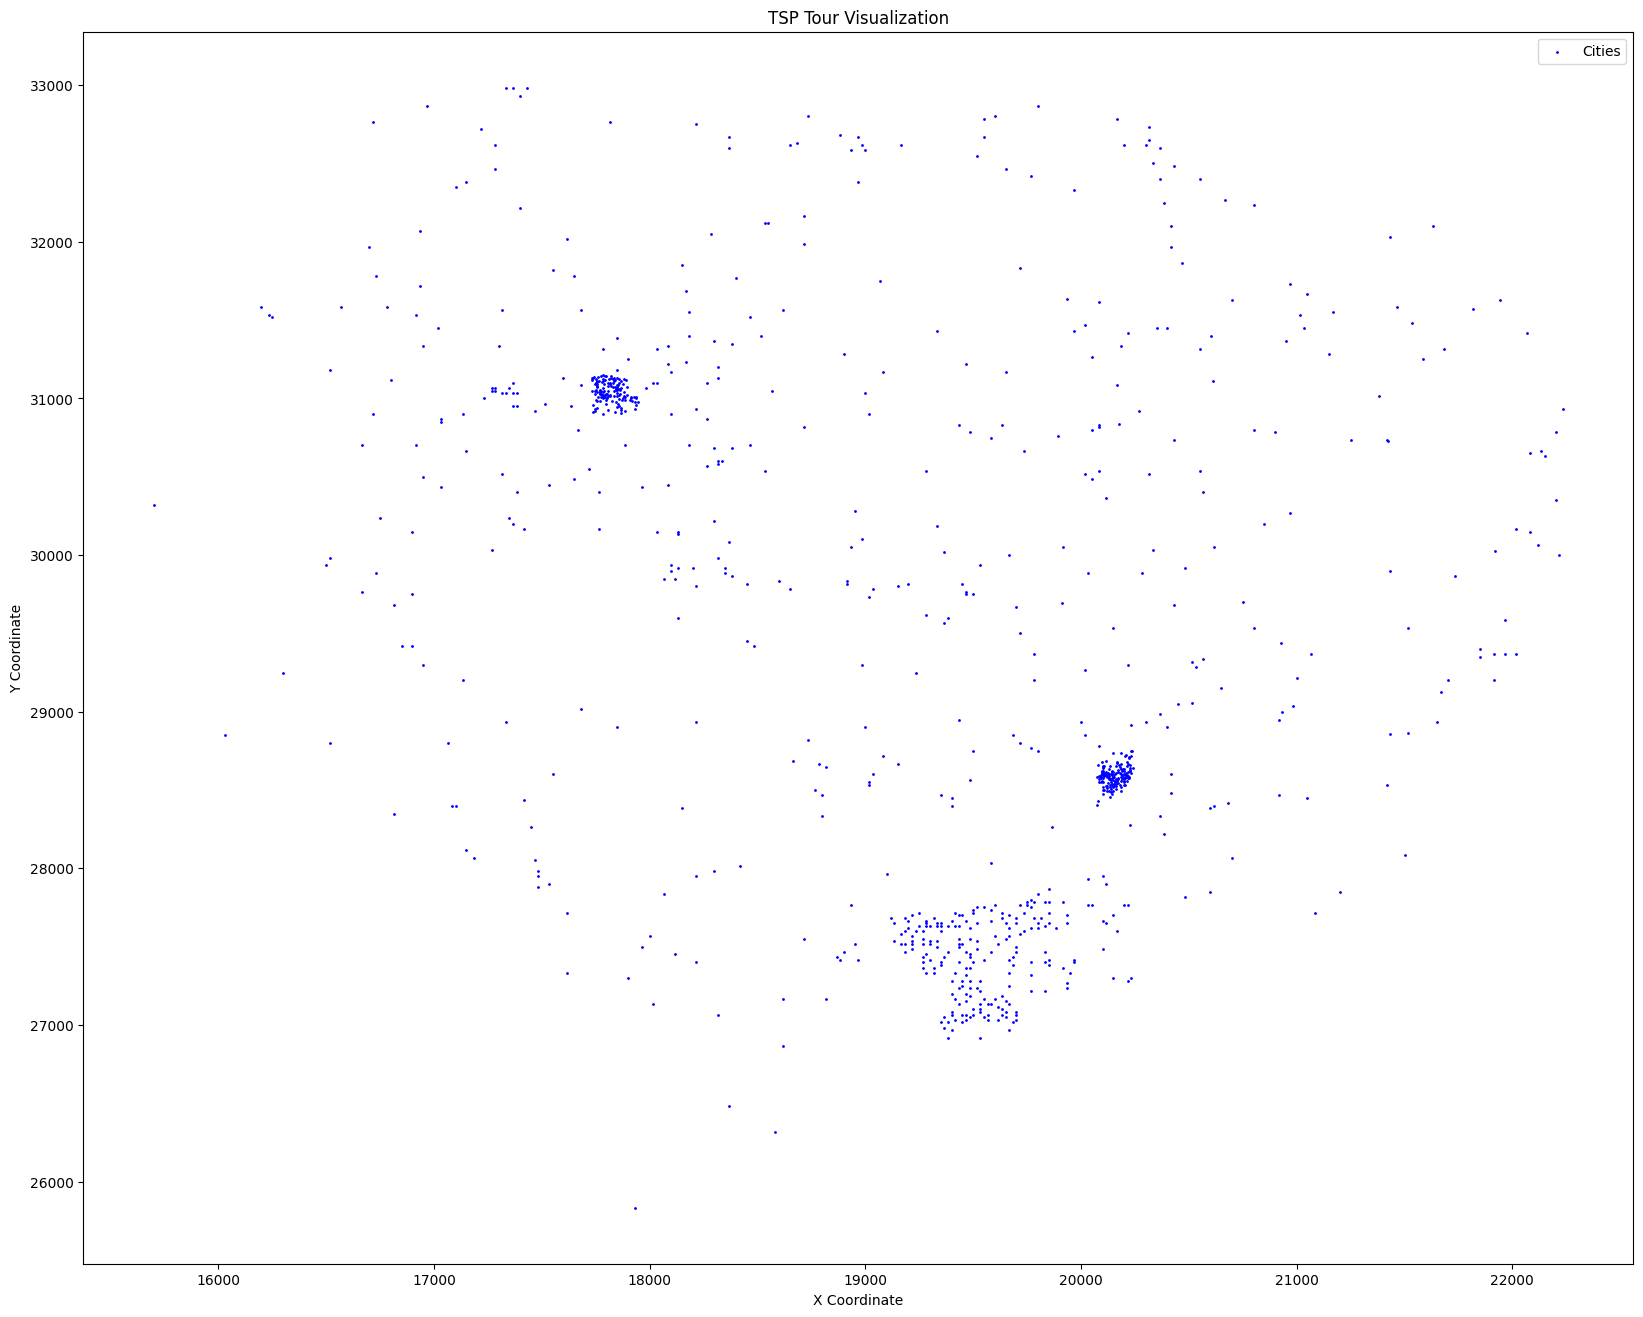

In [28]:
plot_tsp(nodes, show_path=True)

In [176]:
class graph():
    def __init__(self,size,nodes):
        self.size = size
        self.box = [[0]* size for _ in range(size)]
        self.nodes = nodes

    def parrent_nodes(self,u,v,weight):
        self.box[u][v] = weight
        self.box[v][u] = weight

    def make_edges(self):
        self.edges = []
        for i in range(self.size):
            for j in range(i + 1, self.size):  # Only upper triangle
                if self.box[i][j] != 0:
                    self.edges.append((i, j))
    
    def euclidean(self,node1,node2):
        distance = (((node1[0]-node2[0])**2)+((node1[1]-node2[1])**2))**0.5
        return distance

    def K_nearest(self,K=3):
        self.K = K
        for num, node1 in enumerate(self.nodes):
            distances = []

            for idx, node2 in enumerate(self.nodes):
                distance = self.euclidean(node1, node2)
                distances.append((distance, idx))

            # Sort by distance (smallest first)
            distances.sort()

            # Connect to the K nearest neighbors (skip distance to itself at index 0)
            for k in range(1, self.K + 1):
                neighbor_idx = distances[k][1]
                neighbor_dist = distances[k][0]
                self.parrent_nodes(num, neighbor_idx, neighbor_dist)

        self.make_edges()

    def visualize_graph_matplotlib(self,mode = 1):
        plt.figure(figsize=(20, 16))
        # Draw edges
        for edge in  self.edges:
            i, j = edge
            x_values = [self.nodes[i][0], self.nodes[j][0]]
            y_values = [self.nodes[i][1], self.nodes[j][1]]
            plt.plot(x_values, y_values, color='gray', zorder=1)
        # Draw edges
        if(mode == 2):
            for edge in  self.history:
                i, j = edge
                x_values = [self.nodes[i][0], self.nodes[j][0]]
                y_values = [self.nodes[i][1], self.nodes[j][1]]
                plt.plot(x_values, y_values, color='red', zorder=3)
            plt.scatter(self.nodes[self.start][0], self.nodes[self.start][1], color='blue', label='Cities',s = 20,zorder=4,edgecolors='green')
            plt.scatter(self.nodes[self.end][0], self.nodes[self.end][1], color='blue', label='Cities',s = 20,zorder=4,edgecolors='green')

        # Draw nodes
        x_coords = [node[0] for node in self.nodes]
        y_coords = [node[1] for node in self.nodes]
        plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1,zorder=2,edgecolors='blue')

        # Add labels
        for idx, (x, y) in enumerate(self.nodes):
            plt.text(x, y, str(idx), fontsize=9, ha='center', va='center', zorder=3, color='black')

        plt.title("Undirected Graph Visualization")
        #plt.axis('equal')  # Keep aspect ratio square
        plt.grid(True)
        plt.show()

    def dijkstra(self,start,end):
        self.start = start
        self.end = end
        cost =  [sys.maxsize]*self.size
        cost[start] = 0
        visited =  [0]* self.size
        self.history = []

        Queue = [(start,0)]
        while Queue:
            current_node, current_cost = Queue.pop(0)
            if(visited[current_node] == 1): continue
            for neighbor, weight in enumerate(self.box[current_node]):
                if(weight != 0):
                    new_cost = weight + current_cost
                    visited[current_node] = 1
                    if(new_cost < cost[neighbor] and new_cost < cost[end]):
                        cost[neighbor] = new_cost
                        if(neighbor != end):
                            Queue.append((neighbor,new_cost))
                        self.history.append((current_node,neighbor))

        print(cost[end])
        self.visualize_graph_matplotlib(2)



In [177]:
My_Graph = graph(929, nodes)
My_Graph.K_nearest(6)
#My_Graph.visualize_graph_matplotlib()

1224.8955120577737


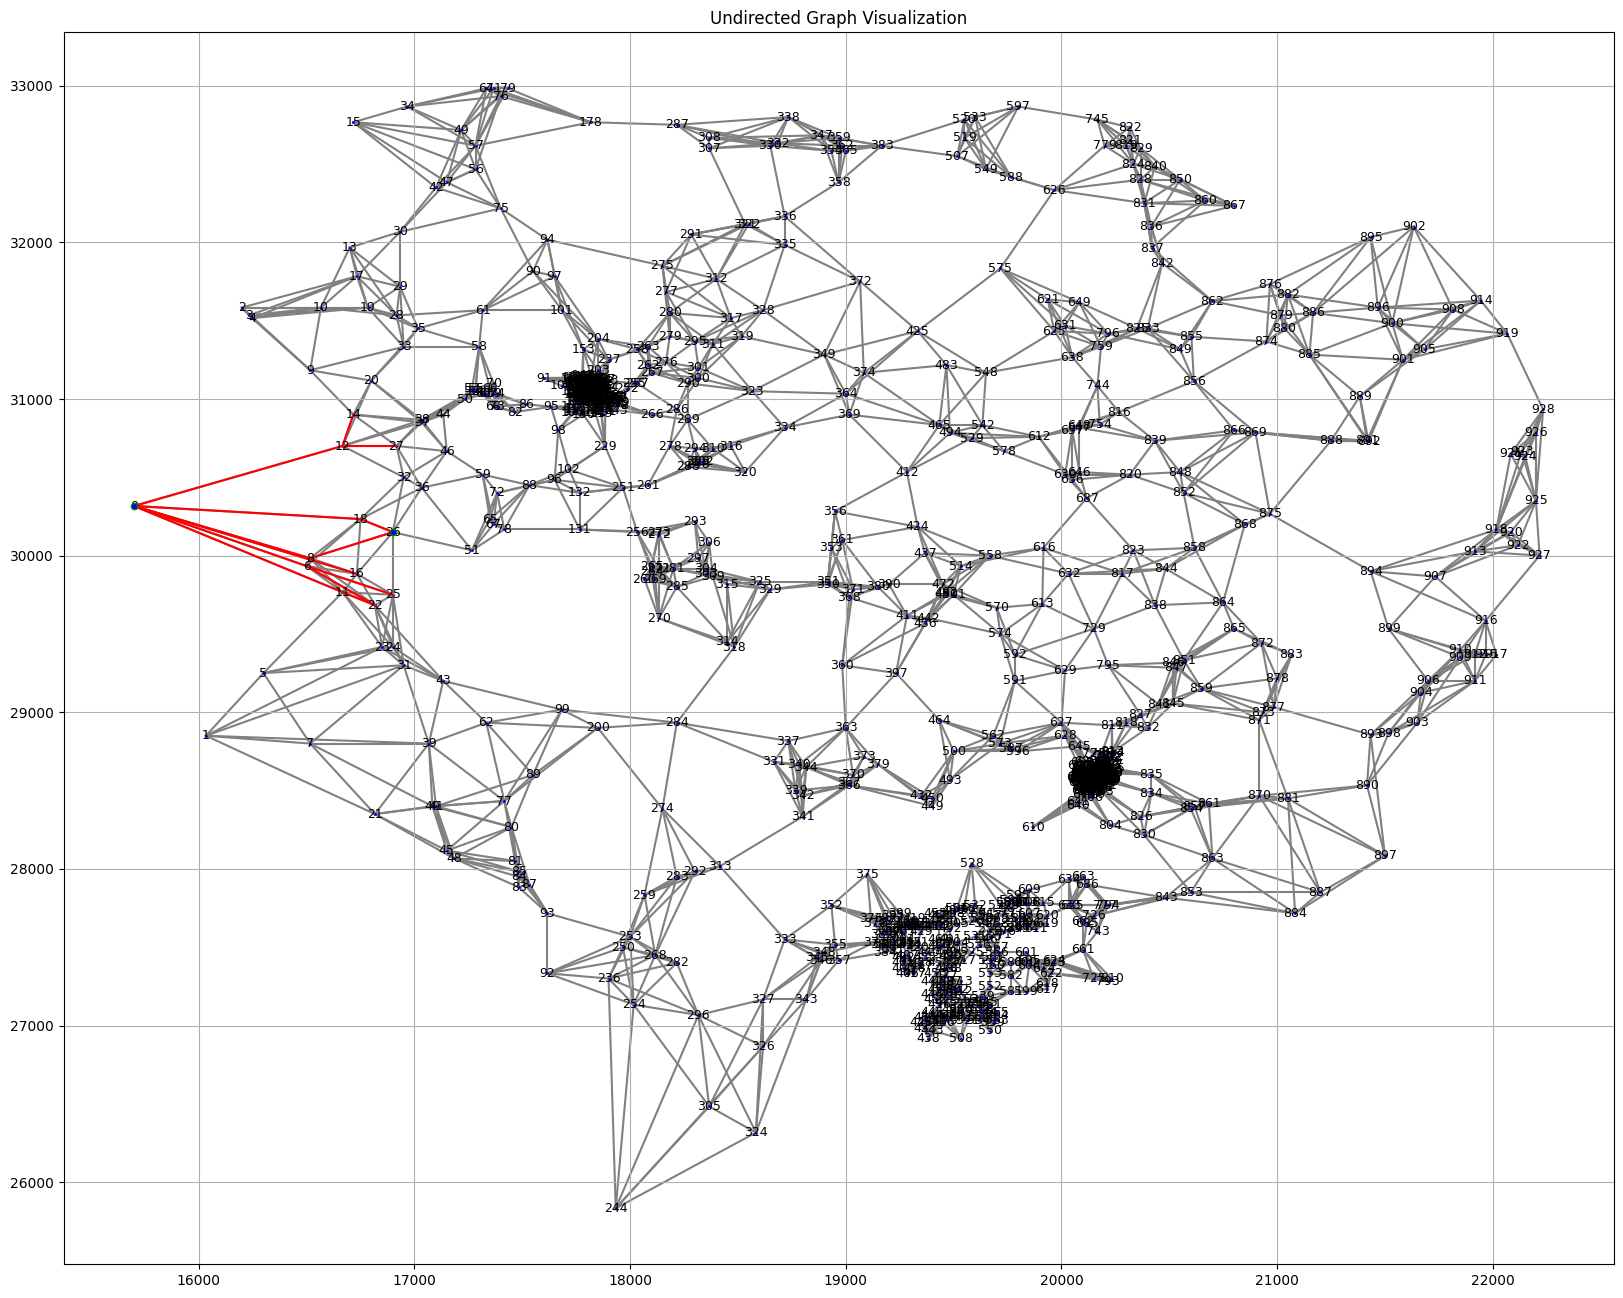

In [178]:
My_Graph.dijkstra(0,26)

In [179]:
#print(My_Graph.box[1])
print(My_Graph.nodes)
print(My_Graph.edges)

[(15700.0, 30316.6667), (16033.3333, 28850.0), (16200.0, 31583.3333), (16233.3333, 31533.3333), (16250.0, 31516.6667), (16300.0, 29250.0), (16500.0, 29933.3333), (16516.6667, 28800.0), (16516.6667, 29983.3333), (16516.6667, 31183.3333), (16566.6667, 31583.3333), (16666.6667, 29766.6667), (16666.6667, 30700.0), (16700.0, 31966.6667), (16716.6667, 30900.0), (16716.6667, 32766.6667), (16733.3333, 29883.3333), (16733.3333, 31783.3333), (16750.0, 30233.3333), (16783.3333, 31583.3333), (16800.0, 31116.6667), (16816.6667, 28350.0), (16816.6667, 29683.3333), (16850.0, 29416.6667), (16900.0, 29416.6667), (16900.0, 29750.0), (16900.0, 30150.0), (16916.6667, 30700.0), (16916.6667, 31533.3333), (16933.3333, 31716.6667), (16933.3333, 32066.6667), (16950.0, 29300.0), (16950.0, 30500.0), (16950.0, 31333.3333), (16966.6667, 32866.6667), (17016.6667, 31450.0), (17033.3333, 30433.3333), (17033.3333, 30850.0), (17033.3333, 30866.6667), (17066.6667, 28800.0), (17083.3333, 28400.0), (17100.0, 28400.0), (17